In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# EDA

explenation features:  
  
Pclass: 1 = First class 2 = Second class 3 = Third class  
SibSp: Number of siblings  
Parch: Number of Parents/Children Aboard  
Embarked: Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)  

In [51]:
df = pd.read_csv("titanic_correct.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [52]:
#Dropping the name, ticket, cabin and because they are not needed
df_cleaned = df.drop(columns=['Name', 'Ticket', 'Cabin', 'PassengerId'])
df_cleaned.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [53]:
df_cleaned.info()
print(df_cleaned.isnull().sum())
# in Age and Embarked are missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB
Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64


In [54]:
# Impute missing Age values with the median age
df_cleaned['Age'].fillna(df_cleaned['Age'].median(), inplace=True)

# Impute missing Embarked values with the mode (most frequent value)
df_cleaned['Embarked'].fillna(df_cleaned['Embarked'].mode()[0], inplace=True)

print(df_cleaned.isnull().sum()) 
df_cleaned.head()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64


C:\Users\Gebruiker\AppData\Local\Temp\ipykernel_28524\2979257303.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned['Age'].fillna(df_cleaned['Age'].median(), inplace=True)
C:\Users\Gebruiker\AppData\Local\Temp\ipykernel_28524\2979257303.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always b

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [55]:
#Encoding data
df_encoded = df_cleaned.copy()
df_encoded = pd.get_dummies(df_encoded,columns=['Sex'], drop_first=True)
df_encoded = pd.get_dummies(df_encoded,columns=['Embarked'])
df_encoded.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,True,False,False,True
1,1,1,38.0,1,0,71.2833,False,True,False,False
2,1,3,26.0,0,0,7.9250,False,False,False,True
3,1,1,35.0,1,0,53.1000,False,False,False,True
4,0,3,35.0,0,0,8.0500,True,False,False,True


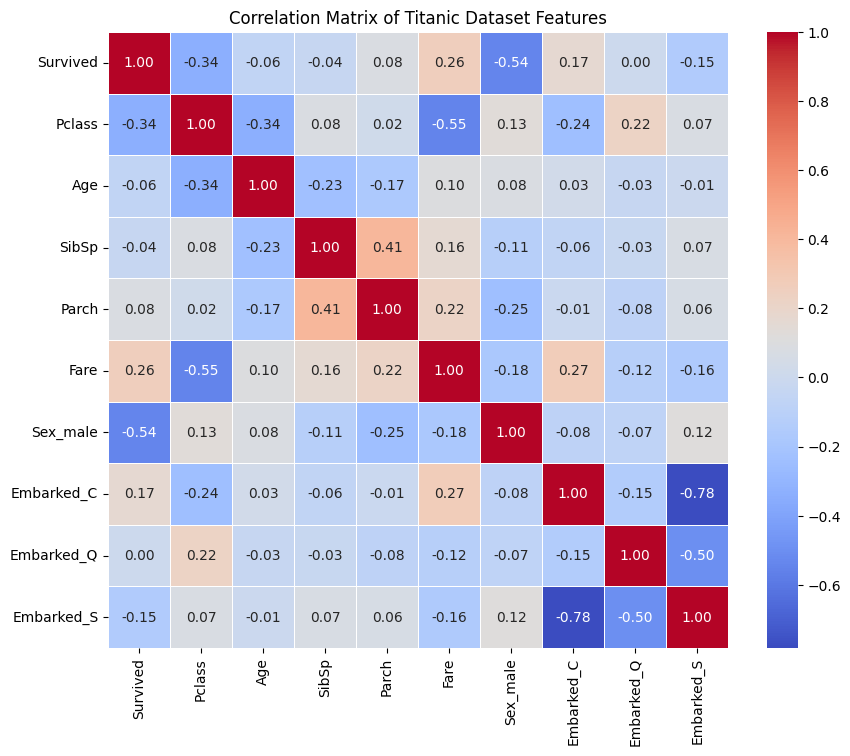

In [56]:
#Correlation Matrix
# Plot the correlation matrix
plt.figure(figsize=(10, 8))
correlation_matrix = df_encoded.corr()

# Using seaborn to create a heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Titanic Dataset Features')
plt.show()


There is a high positive corrolation between Survived and Sex because survived has value 1 and female has value 1. Women (and children) were allowed to get on lifeboats first.  
there is a high negative corrolation between Pclass and Fare because first class is value 1 and third class is value 3 thus how higher the value, how lower the Fare.  
  
there is a negative corrolation of -0.34 between Age and Pclass. I want to look a little bit deeper on that.

C:\Users\Gebruiker\AppData\Local\Temp\ipykernel_28524\3794969527.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pclass_age_counts = df.groupby(['Pclass', pd.cut(df['Age'], bins=age_bins)]).size().unstack(fill_value=0)


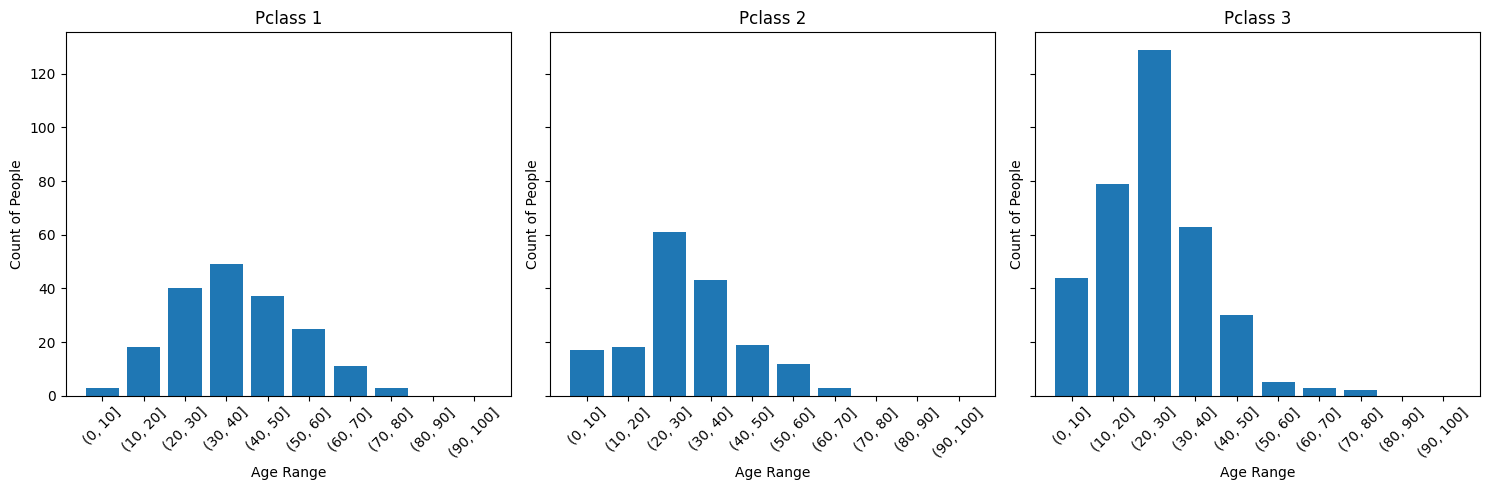

In [57]:
# Define age bins (0-9, 10-19, 20-29, etc.)
age_bins = range(0, 101, 10)

# Group by both 'Pclass' and 'AgeRange', and count the entries
pclass_age_counts = df.groupby(['Pclass', pd.cut(df['Age'], bins=age_bins)]).size().unstack(fill_value=0)

# Plotting
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

# Loop through each Pclass
for i, pclass in enumerate(pclass_age_counts.index):
    age_counts = pclass_age_counts.loc[pclass]
    axes[i].bar(age_counts.index.astype(str), age_counts.values)
    axes[i].set_title(f'Pclass {pclass}')
    axes[i].set_xlabel('Age Range')
    axes[i].set_ylabel('Count of People')
    axes[i].tick_params(axis='x', rotation=45)  # Rotate x labels for readability

plt.tight_layout()
plt.show()


The negative corrolation of -0.34 is because there are a lot of young people in the third class. So how higher the value of the class how lower the age.

# Model

In [58]:
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [59]:
from sklearn.model_selection import train_test_split
train, test_and_validate = train_test_split(df_encoded, test_size=0.2, random_state=42, stratify=df_encoded['Survived'])

In [60]:
test, validate = train_test_split(test_and_validate, test_size=0.5, random_state=42, stratify=test_and_validate['Survived'])

In [61]:
print(train.shape)
print(test.shape)
print(validate.shape)
test.head()

(712, 10)
(89, 10)
(90, 10)


,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_C,Embarked_Q,Embarked_S
799,0,3,30.0,1,1,24.1500,False,False,False,True
397,0,2,46.0,0,0,26.0000,True,False,False,True
614,0,3,35.0,0,0,8.0500,True,False,False,True
428,0,3,28.0,0,0,7.7500,True,False,True,False
485,0,3,28.0,3,1,25.4667,False,False,False,True


In [62]:
print(train['Survived'].value_counts())
print(test['Survived'].value_counts())
print(validate['Survived'].value_counts())

Survived
0    439
1    273
Name: count, dtype: int64
Survived
0    55
1    34
Name: count, dtype: int64
Survived
0    55
1    35
Name: count, dtype: int64


# Intermezzo: Uploading data to Amazon S3

# Don't run this!

In [63]:
# bucket='c135194a3427158l8213279t1w722091310768-labbucket-foftcvpkmni4'

# prefix='lab3'

# train_file='vertebral_train.csv'
# test_file='vertebral_test.csv'
# validate_file='vertebral_validate.csv'

# import os

# s3_resource = boto3.Session().resource('s3')
# def upload_s3_csv(filename, folder, dataframe):
#     csv_buffer = io.StringIO()
#     dataframe.to_csv(csv_buffer, header=False, index=False)
#     s3_resource.Bucket(bucket).Object(os.path.join(prefix, folder, filename)).put(Body=csv_buffer.getvalue())

In [64]:
# upload_s3_csv(train_file, 'train', train)
# upload_s3_csv(test_file, 'test', test)
# upload_s3_csv(validate_file, 'validate', validate)

# Upload train, test and validate to CSV file

In [71]:
train.to_csv('train.csv', index=False)
test.to_csv('test.csv', index=False, header=False)
validate.to_csv('validate.csv', index=False, header=False)

# PyCaret model

In [73]:
df_caret_train = pd.read_csv('train.csv')
df_caret_train

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,3,28.0,0,0,56.4958,True,False,False,True
1,0,2,28.0,0,0,0.0000,True,False,False,True
2,0,1,28.0,0,0,221.7792,True,False,False,True
3,1,3,18.0,0,1,9.3500,False,False,False,True
4,1,2,31.0,1,1,26.2500,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...
707,1,3,28.0,0,0,7.8792,False,False,True,False
708,1,1,35.0,0,0,512.3292,False,True,False,False
709,0,3,48.0,1,3,34.3750,False,False,False,True
710,0,1,47.0,0,0,38.5000,True,False,False,True


In [74]:
from pycaret.regression import *

s= setup(df_caret_train, target='Survived')

ModuleNotFoundError: No module named 'pycaret'